**Import library**

In [1]:
import os
import numpy as np
from keras.preprocessing.image import load_img, img_to_array
import random
from keras.preprocessing.image import load_img, img_to_array
from keras.applications.vgg16 import VGG16, preprocess_input
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten
import matplotlib.pyplot as plt

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


เอาชื่อ pokemon เข้ามา จาก directory ของ folder PokemonData

In [3]:
directory = "/content/drive/My Drive/344-331/PokemonData"
labels = os.listdir(directory)
labels

['Pikachu', 'Mewtwo', 'Mew', 'Eevee', 'Ditto', 'Charizard']

นำรูป Pokemon เข้ามา

In [4]:
def load_and_preprocess_data(directory):
    dataset = []
    labels = os.listdir(directory)
    count = 0
    for label in labels:
        folder = os.path.join(directory, label)
        for image in os.listdir(folder):
            try:
                img = load_img(os.path.join(folder, image), target_size=(224, 224))
                img = img_to_array(img)
                img = preprocess_input(img)
                dataset.append((img, count))
            except Exception as e:
                print(f"Error loading image '{image}': {str(e)}")

        print(f'\rCompleted: {label}', end='')
        count += 1

    random.shuffle(dataset)
    X, y = zip(*dataset)

    return np.array(X), np.array(y), labels

In [5]:
images, labels, label_names = load_and_preprocess_data(directory)

Completed: Charizard

In [6]:
np.unique(label_names)

array(['Charizard', 'Ditto', 'Eevee', 'Mew', 'Mewtwo', 'Pikachu'],
      dtype='<U9')

**แสดงรูป ตัวอย่าง Pokemon 10 รูป**

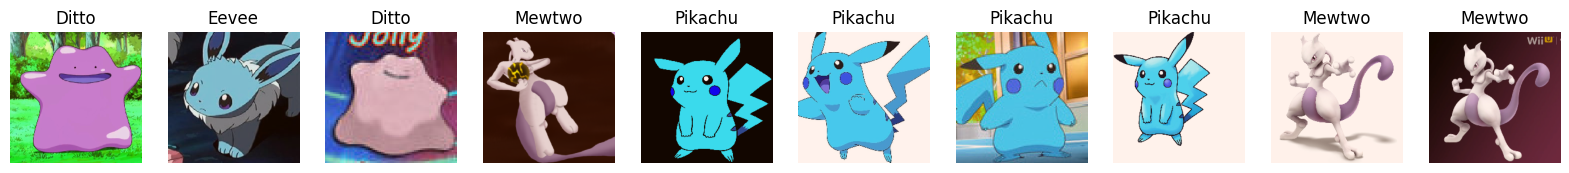

In [7]:
num_images = 10

fig, axes = plt.subplots(1, num_images, figsize=(20, 5))

for i in range(num_images):
    image = images[i]
    image = image - np.min(image)
    image = image / np.max(image)

    axes[i].imshow(image)
    axes[i].set_title(label_names[labels[i]])
    axes[i].axis('off')

plt.show()

**แยกข้อมูลออกเป็น ชุด test และ train**

In [8]:
X_train, X_test, y_train, y_test = train_test_split(images, labels, test_size=0.25, random_state=1)

**ทำ Feature extraction ด้วย vgg16**

In [9]:
# Load pre-trained VGG16 model
vgg_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

58889256/58889256 [==============================] - 3s 0us/step


In [10]:
# Extract features
X_train_features = vgg_model.predict(X_train)
X_test_features = vgg_model.predict(X_test)

3/3 [==============================] - 42s 11s/step


In [11]:
# Flatten extracted features
X_train_flatten = X_train_features.reshape(X_train_features.shape[0], -1)
X_test_flatten = X_test_features.reshape(X_test_features.shape[0], -1)

**SAVE ข้อมูลที่ได้ทำการ Feature extraction**

In [12]:
np.savetxt('X_train_features.csv', X_train_flatten, delimiter=',')
np.savetxt('X_test_features.csv', X_test_flatten, delimiter=',')

**ใช้ model CNN**

In [13]:
model = Sequential([
    Flatten(input_shape=X_train_flatten.shape[1:]),
    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(len(label_names), activation='softmax')
])

In [14]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [15]:
history = model.fit(X_train_flatten, y_train,
                    epochs=10,
                    batch_size=32,
                    validation_data=(X_test_flatten, y_test))

Epoch 1/10
7/7 [==============================] - 3s 315ms/step - loss: 40.3899 - accuracy: 0.5048 - val_loss: 4.2701 - val_accuracy: 0.9000
Epoch 2/10
7/7 [==============================] - 2s 241ms/step - loss: 7.5152 - accuracy: 0.9000 - val_loss: 3.9197 - val_accuracy: 0.9000
Epoch 3/10
7/7 [==============================] - 2s 242ms/step - loss: 0.4532 - accuracy: 0.9810 - val_loss: 4.9020 - val_accuracy: 0.9571
Epoch 4/10
7/7 [==============================] - 2s 239ms/step - loss: 2.0400 - accuracy: 0.9810 - val_loss: 7.7938 - val_accuracy: 0.9286
Epoch 5/10
7/7 [==============================] - 2s 245ms/step - loss: 0.5659 - accuracy: 0.9905 - val_loss: 3.6528 - val_accuracy: 0.9714
Epoch 6/10
7/7 [==============================] - 2s 289ms/step - loss: 0.4009 - accuracy: 0.9952 - val_loss: 4.1695 - val_accuracy: 0.9571
Epoch 7/10
7/7 [==============================] - 3s 399ms/step - loss: 4.2007e-08 - accuracy: 1.0000 - val_loss: 4.6454 - val_accuracy: 0.9429
Epoch 8/10
7/7 

3/3 [==============================] - 0s 18ms/step


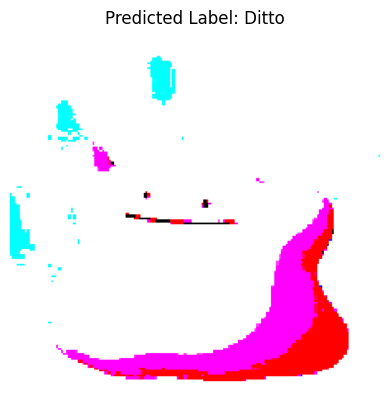

In [17]:
import numpy as np
import matplotlib.pyplot as plt

# Make predictions on test data
predictions = model.predict(X_test_flatten)

# Choose a random index to display the prediction
index = np.random.randint(0, len(X_test_flatten))

# Get the predicted label
predicted_label_index = np.argmax(predictions[index])
predicted_label = label_names[predicted_label_index]

# Display the image and predicted label
plt.imshow(X_test[index])  # Assuming X_test contains original images
plt.title(f'Predicted Label: {predicted_label}')
plt.axis('off')
plt.show()
